In [1]:
import numpy as np
import os
data_dir = '../data'

In [2]:
x_dataset = []
u_dataset = []

for item in os.listdir(data_dir):
    data_file_path = os.path.join(data_dir, item)

    # Check if the file is a directory
    if data_file_path.endswith('.npy') and os.path.exists(data_file_path):
        data_dict = np.load(data_file_path, allow_pickle=True).item()
        x_data = data_dict['signals'][:, :-6]
        if x_data.shape[0]!= 3417 or x_data.shape[1]!= 68:
            print("cannot load {data_file_path}")
        uu_data = data_dict['signals'][:, -4:]
        ErrorType = data_dict['ErrorType']
        u_data = np.concatenate((uu_data,np.tile( ErrorType, (len(x_data), 1))), axis=1)
        x_dataset.append(x_data)
        u_dataset.append(u_data)


In [3]:
x_dataset[0]

array([[-8.64630346e-03,  8.64650443e+00, -2.91834735e+01, ...,
         6.67206704e+00, -1.99442529e+03,  1.68730140e+01],
       [ 2.61954830e+02,  9.41716090e+00,  2.32360613e+02, ...,
         7.44165346e+00, -1.76080022e+03,  1.74376293e+01],
       [ 5.23878858e+02,  1.01863955e+01,  4.93871223e+02, ...,
         8.21011963e+00, -1.52690998e+03,  1.79996186e+01],
       ...,
       [-5.23896476e+02,  7.43239992e+00, -5.53275374e+02, ...,
         4.96750916e+00, -3.13199471e+03,  1.63187871e+01],
       [-2.61972288e+02,  8.04062125e+00, -2.85646731e+02, ...,
         5.90774375e+00, -2.90276644e+03,  1.69540950e+01],
       [-8.70239297e-03,  8.70259385e+00, -3.46441385e+01, ...,
         7.07597857e+00, -2.61593593e+03,  1.75521035e+01]])

In [4]:
x_dataset[2]

array([[-1.05056090e-02,  1.05058100e+01, -2.78512772e+01, ...,
         8.52743617e+00, -1.92897867e+03,  1.82937159e+01],
       [ 2.61953038e+02,  1.12097052e+01,  2.33739992e+02, ...,
         9.23023710e+00, -1.69187591e+03,  1.87957230e+01],
       [ 5.23877132e+02,  1.19119085e+01,  4.95297576e+02, ...,
         9.93164843e+00, -1.45451836e+03,  1.92948997e+01],
       ...,
       [-5.23900137e+02,  1.10936437e+01, -5.36645842e+02, ...,
         8.34055230e+00, -2.55343021e+03,  1.91936808e+01],
       [-2.61975578e+02,  1.13311383e+01, -2.77481684e+02, ...,
         9.57838828e+00, -2.31278629e+03,  1.92851237e+01],
       [-1.17683766e-02,  1.17685775e+01, -3.05006423e+01, ...,
         1.04887091e+01, -1.85430439e+03,  1.96203725e+01]])

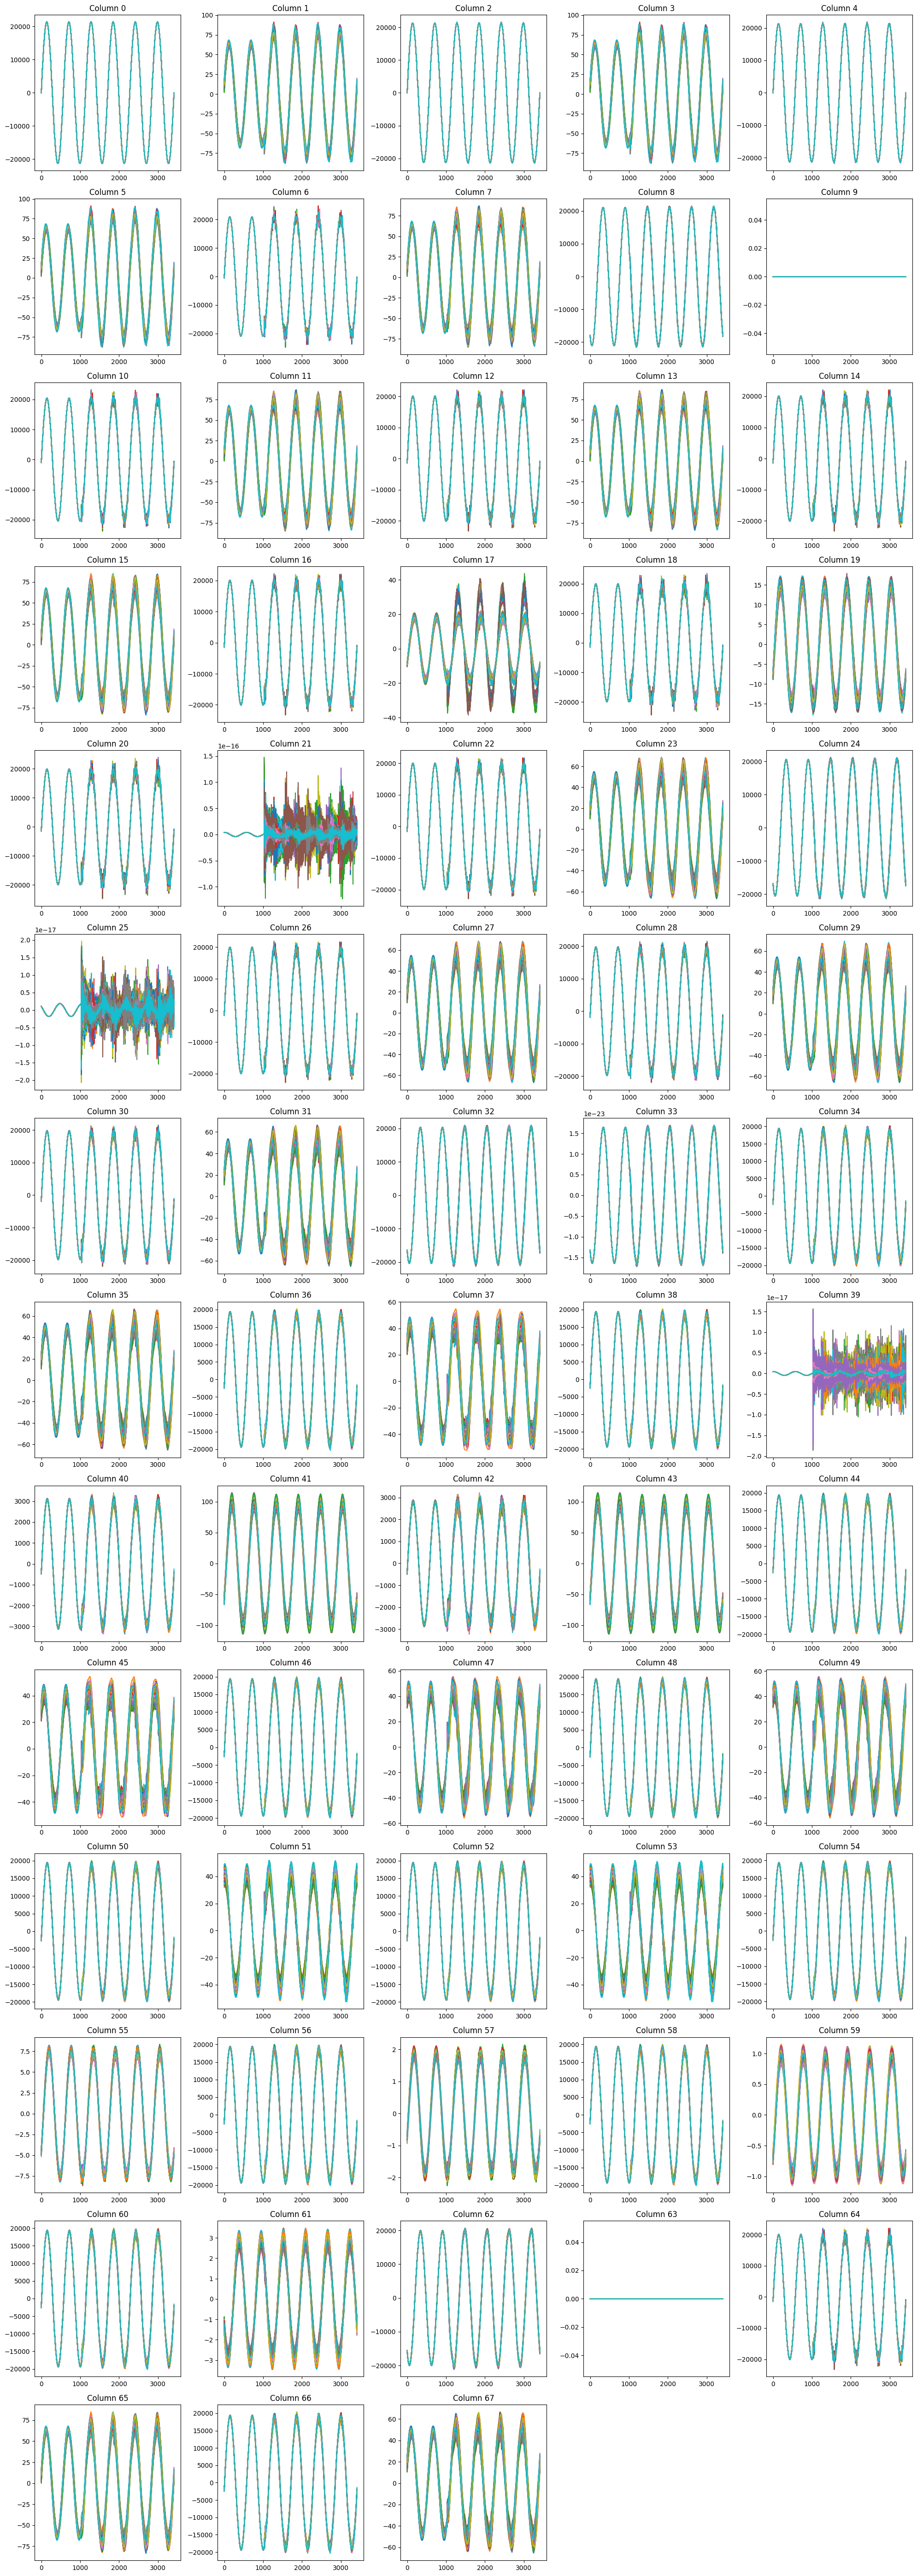

In [5]:
import matplotlib.pyplot as plt
import numpy as np


num_columns = 5
num_rows = (68 + num_columns - 1) // num_columns  # Calculate rows based on columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 4 * num_rows))
axes = axes.flatten()  # Flatten for easier indexing

for k in range(68):
    for array in x_dataset:
        axes[k].plot(array[:, k])  # Plot column k of each array
    axes[k].set_title(f"Column {k}")

# Hide any extra subplots
for ax in axes[68:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

/tmp/ipykernel_3494076/325146935.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axes[k].set_yscale('log')         # y-axis logarithmic scale


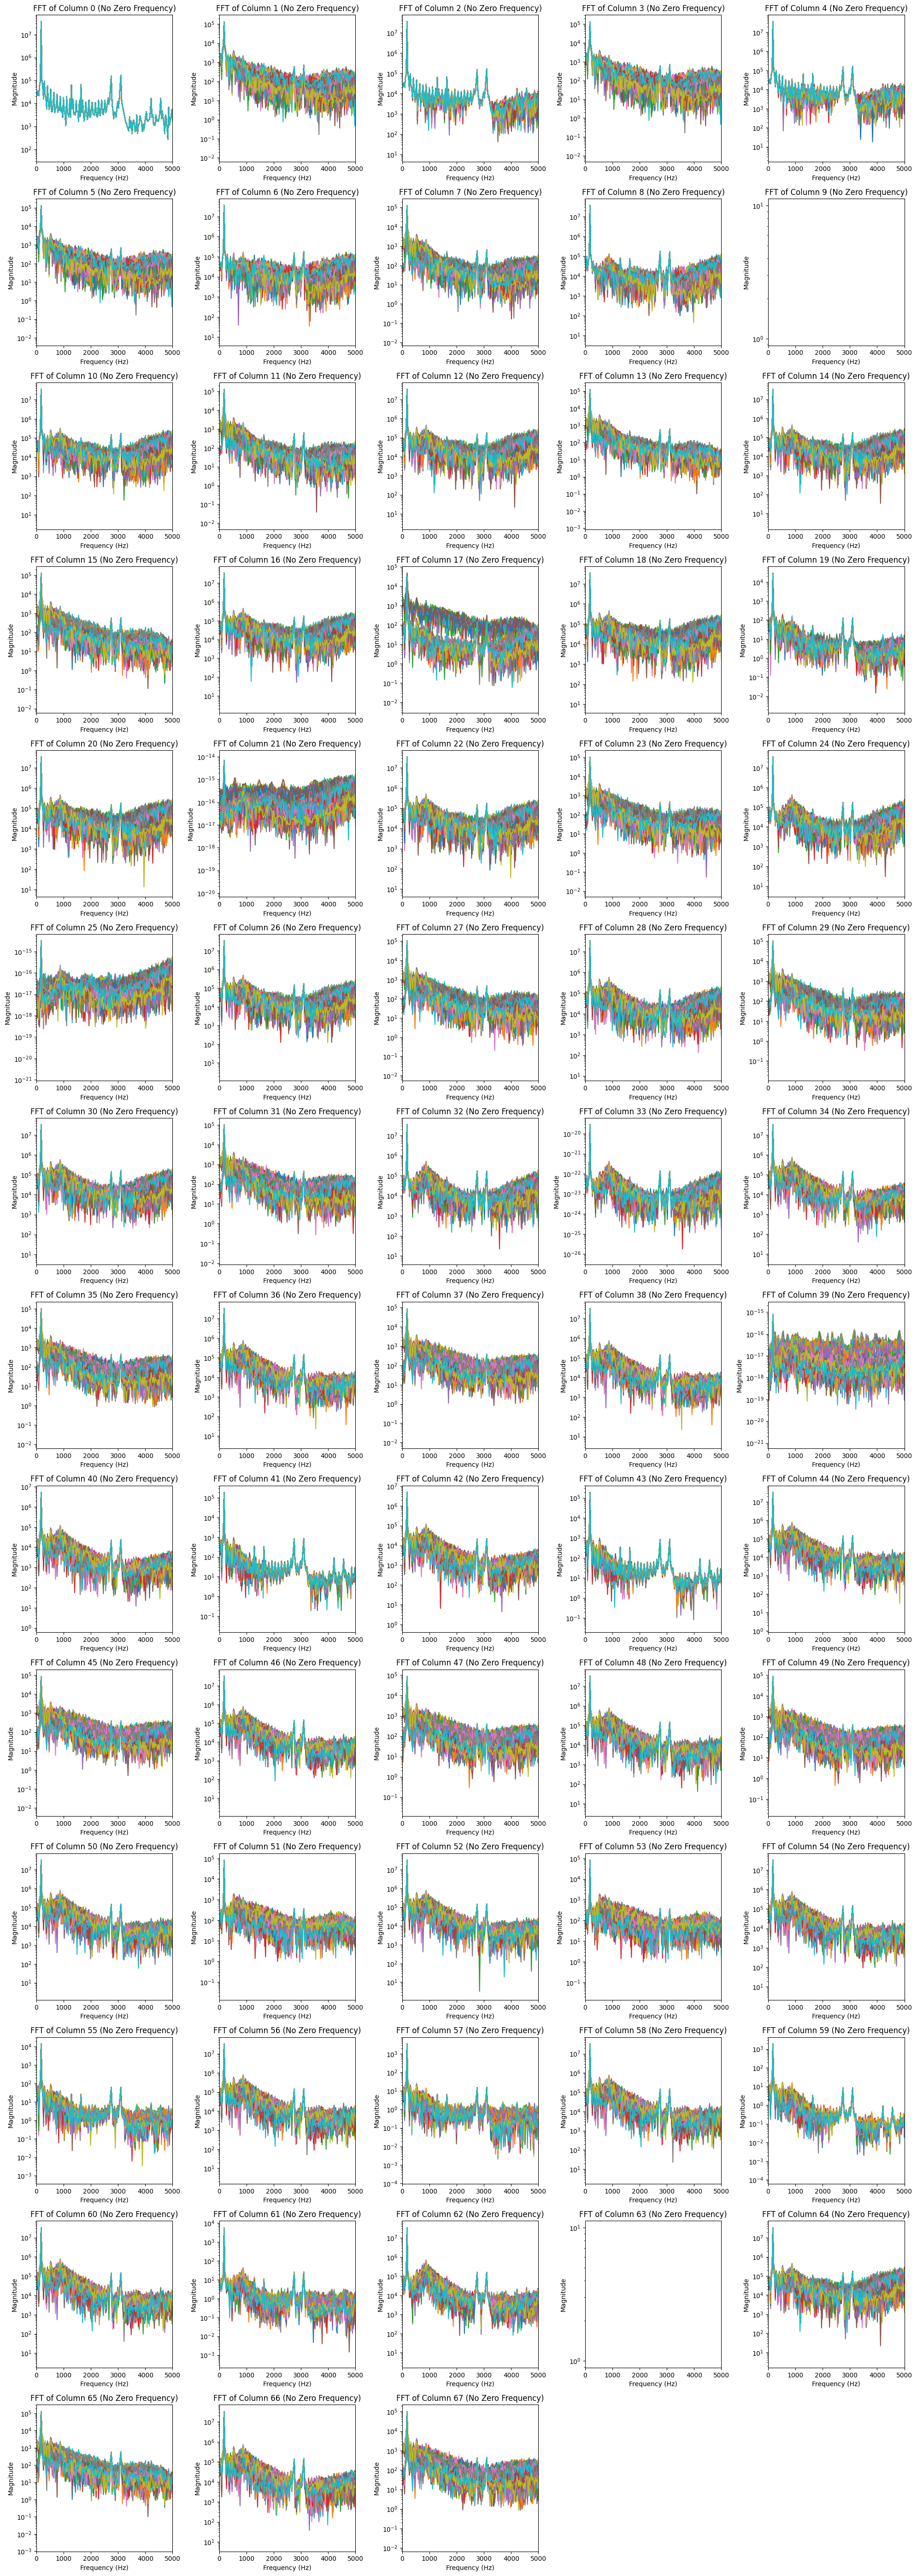

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Number of columns in the subplot grid
num_columns = 5
num_rows = (68 + num_columns - 1) // num_columns  # Compute number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 4 * num_rows))
axes = axes.flatten()

# Sampling rate (Hz)
sampling_rate = 100000

for k in range(68):  # Iterate over columns
    for array in x_dataset:
        # Compute FFT
        fft_values = np.fft.fft(array[:, k])
        fft_magnitude = np.abs(fft_values)  # Magnitude of FFT
        fft_freqs = np.fft.fftfreq(len(fft_values), d=1/sampling_rate)  # Frequency bins
        
        # Exclude zero frequency
        nonzero_indices = fft_freqs != 0  # Mask to exclude zero frequency
        nonzero_freqs = fft_freqs[nonzero_indices]
        nonzero_magnitude = fft_magnitude[nonzero_indices]
        
        # Plot positive nonzero frequencies only
        positive_freqs = nonzero_freqs[nonzero_freqs > 0]
        positive_magnitude = nonzero_magnitude[nonzero_freqs > 0]
        axes[k].plot(positive_freqs, positive_magnitude, label='Array')  # Plot FFT magnitude
        
    # Set axis limits and scales
    axes[k].set_xlim(0, 5000)         # x-axis range
    axes[k].set_yscale('log')         # y-axis logarithmic scale
    axes[k].set_title(f"FFT of Column {k} (No Zero Frequency)")
    axes[k].set_xlabel("Frequency (Hz)")
    axes[k].set_ylabel("Magnitude")

# Hide unused subplots
for ax in axes[68:]:
    ax.axis('off')

plt.tight_layout()
plt.show()